라이브러리 import

In [90]:
import pandas as pd
import numpy as np 
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [91]:
data_path = '/Users/jun/GitStudy/Data_4/Data/statistic/'
os.chdir(data_path)
os.listdir()

['statistics.csv']

# 1. 기초통계

## statistics csv 파일을 읽고, 성별 Review Rating 에 대한 평균과 중앙값을 구해주세요.
(결과는 소수점 둘째자리까지 표현해주세요.)

In [92]:
statistics_df = pd.read_csv('statistics.csv')
statistics_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### 1. groupby().agg() 사용

In [93]:
statistics_df.groupby('Gender')['Review Rating'].agg(['mean','median']).round(2)

,mean,median
Gender,,
Female,3.74,3.7
Male,3.75,3.8


### 2. pandas 조건문 describe() 사용

In [94]:
statistics_df[statistics_df['Gender'] == 'Male']['Review Rating'].describe().round(2)

count    2652.00
mean        3.75
std         0.71
min         2.50
25%         3.10
50%         3.80
75%         4.40
max         5.00
Name: Review Rating, dtype: float64

In [95]:
statistics_df[statistics_df['Gender'] == 'Female']['Review Rating'].describe().round(2)

count    1248.00
mean        3.74
std         0.72
min         2.50
25%         3.10
50%         3.70
75%         4.30
max         5.00
Name: Review Rating, dtype: float64

### 해석
statistics.csv 에서 성별 평균값과 중앙값을 확인해보면


>남성의 평균값 : 3.75 , 중앙값 : 3.7</br>
여성의 평균값 : 3.74 , 중앙값 : 3.8


- 남성과 여성 모두 평균 평점(3.75/3.74)과 표준편차(표준편차 약 0.71/0.72)가 거의 동일하고 중앙값(3.7/3.8) 또한 비슷하다.
- 남성의 리뷰 수가 약 2배 이상 많음.

</br>

# 2. 통계적 가설검정

성별, Review Rating 컬럼에 대한 T-TEST 를 진행해주세요.

### 1) 귀무가설과 대립가설을 작성

귀무가설 : 성별, Review Rating의 값의 차이가 없을 것이다.

대립가설 : 성별, Review Rating의 값이 차이가 있을 것이다.

### 2) t-score, P-value 구하기

In [20]:
# 남성, 여성의 Review Rating 값 가져오기
male = statistics_df[statistics_df['Gender']=='Male']['Review Rating']
female = statistics_df[statistics_df['Gender']=='Female']['Review Rating']

# 평균 점수 계산
mean_male = np.mean(male)
mean_female = np.mean(female)

# t-검정 수행
t_stat, p_value = stats.ttest_ind(male, female)

# 평균 점수
print("남성 평균 점수: {:0.2f}".format(mean_male))
print("여성 평균 점수: {:0.2f}".format(mean_female))
print(f"t-score: {t_stat}")
print(f"P-value: {p_value}")

남성 평균 점수: 3.75
여성 평균 점수: 3.74
t-score: 0.5097147504896427
P-value: 0.6102801734916257


### 3) 귀무가설 채택/기각 여부

#### 귀무가설이 채택되었다.

근거
- p-value는 귀무가설이 참일 때, 관찰된 결과 이상으로 극단적인 결과가 나올 확률을 의미함. 일반적으로 p-value가 유의수준(α)보다 작으면 귀무가설을 기각하게 된다. 

- 유의수준으로 많이 사용하는 값은 0.05

- 해당 t-test 에서의 p-value를 확인해 보았을 때, `p_value` 의 값은 `0.61` 로 `유의수준(α)`인 `0.05` 보다 크고, 결과가 유의미하지 않다고 판단되어 귀무가설이 채택되었다.

</br>

# 3. 통계적 가설검정2
Color, Season 컬럼에 대한 카이제곱 검정을 진행해주세요.

### 1)귀무가설과 대립가설을 작성해주세요.

귀무가설 : 색상과 계절은 연관이 없을 것이다.

대립가설 : 색상과 계절은 연관이 있을 것이다.

### 2)두 범주형 자료의 빈도표를 만들어주세요. 이를 코드로 작성하여 기재해주세요.

In [21]:
# groupby로도 빈도표와 비슷하게 확인 가능
statistics_df.groupby(['Season','Color'])['Customer ID'].count().reset_index()

,Season,Color,Customer ID
0,Fall,Beige,34
1,Fall,Black,42
2,Fall,Blue,32
3,Fall,Brown,35
4,Fall,Charcoal,32
...,...,...,...
95,Winter,Teal,37
96,Winter,Turquoise,41
97,Winter,Violet,37
98,Winter,White,36


In [22]:
# 자료의 빈도표
result = pd.crosstab(statistics_df['Season'],statistics_df['Color'], margins=True)
result

Color,Beige,Black,Blue,Brown,Charcoal,Cyan,Gold,Gray,Green,Indigo,...,Pink,Purple,Red,Silver,Teal,Turquoise,Violet,White,Yellow,All
Season,,,,,,,,,,,,,,,,,,,,,
Fall,34,42,32,35,32,43,36,44,37,37,...,35,37,42,39,40,27,44,27,50,975
Spring,39,43,39,33,42,42,38,48,38,37,...,44,43,31,37,46,41,45,36,40,999
Summer,37,42,46,33,36,42,30,40,44,32,...,29,38,36,59,49,36,40,43,38,955
Winter,37,40,35,40,43,39,34,27,50,41,...,45,33,39,38,37,41,37,36,46,971
All,147,167,152,141,153,166,138,159,169,147,...,153,151,148,173,172,145,166,142,174,3900


### 3)카이제곱통계량, P-value 를 구해주세요.

카이제곱 검정은 두 범주형 변수에 대한 분석 방법으로, 세가지 검증 방법이 있다.

1. 적합도 검정 : 한 범주형 변수의 각 그룹 별 비율과 특정 상수비가 같은지 검증
   >단일 변수의 분포가 기대값과 일치하는지 확인할 때 사용

2. 독립성 검정 : 두 범주형 변수가 서로 독립인지 검정하는 것
   >두 변수 간의 관계를 검증할 때 사용

3. 동질성 검정 : 각 집단이 서로 유사한 성향을 갖는지 분석하는 것
   >여러 집단이 동일한 분포를 보이는지 비교할 때 사용

"Season"과 "Color" 두 범주형 변수가 서로 독립인지, 즉 `관련성이 없는지를 검증`해야 하므로 `독립성 검정을 진행`함.

In [23]:
# 카이제곱 검정 진행
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed=result)
print(chi2_stat,p_value)

64.6506366841786 0.9976481762382112


In [24]:
# 카이제곱통계량
# 값이 클수록 두 변수 간의 관계가 강하다는 의미일 수 있습니다.
print("카이제곱 통계량 : {}".format(chi2_stat))

카이제곱 통계량 : 64.6506366841786


In [13]:
# pvalue 확인
print("p-value : {}".format(p_value))

p-value : 0.9976481762382112


### 4)그리고 이에 대한 귀무가설 채택/기각 여부와 그렇게 생각한 이유를 간략하게 설명해주세요.

#### 귀무가설이 채택되었다.

근거
- p-value는 귀무가설이 참일 때, 관찰된 결과 이상으로 극단적인 결과가 나올 확률을 의미함. 일반적으로 p-value가 유의수준(α)보다 작으면 귀무가설을 기각하게 된다. 

- 유의수준으로 많이 사용하는 값은 0.05

- 해당 t-test 에서의 p-value를 확인해 보았을 때, `p_value` 의 값은 `0.99` 로 `유의수준(α)`인 `0.05` 보다 크고, 결과가 유의미하지 않다고 판단되어 귀무가설이 채택되었다.

</br>

# 4. 머신러닝1
### 1) 아래와 같은 데이터가 있다고 가정하겠습니다.데이터를 바탕으로 선형 회귀 모델을 훈련시키고, 회귀식을 작성해주세요.

- 독립 변수(X): 광고예산 (단위: 만원)
- 종속 변수(Y): 일일 매출 (단위: 만원)
- X=[10, 20, 30, 40, 60, 100]
- Y=[50, 60, 70, 80, 90, 120]

In [ ]:
X=[10, 20, 30, 40, 60, 100]
Y=[50, 60, 70, 80, 90, 120]

#X = np.array([10, 20, 30, 40, 60, 100]).reshape(-1,1)

budget_sales_df = pd.DataFrame({"budget": X, "sales":Y})
budget_sales_df

,budget,sales
0,10,50
1,20,60
2,30,70
3,40,80
4,60,90
5,100,120


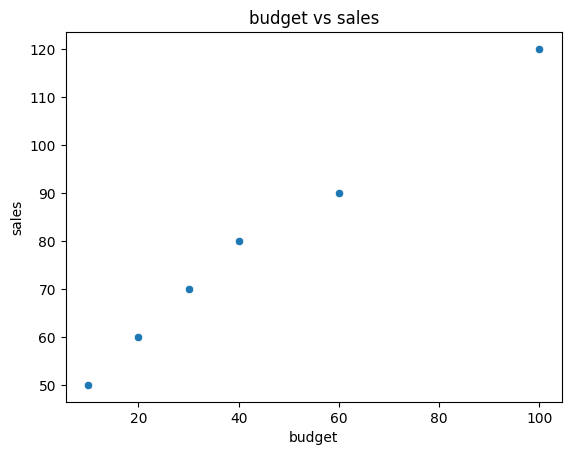

In [15]:
#두 변수 간 산점도 확인해보기!
sns.scatterplot(data = budget_sales_df, x = 'budget', y = 'sales')
plt.title('budget vs sales')
plt.xlabel('budget')
plt.ylabel('sales')
plt.show()

In [ ]:
# 모델 학습을 위한 transform
X = budget_sales_df[['budget']]
Y = budget_sales_df[['sales']]

In [ ]:
# 모델 학습
model_lr = LinearRegression()
model_lr.fit(X,Y)

LinearRegression()

In [18]:
# 회귀식 작성
w1 = model_lr.coef_[0][0] #가중치 (w1)
w0 = model_lr.intercept_[0] #편향(bias ,wo)

print('y = {}x + {}'.format(w1.round(2),w0.round(2)))

y = 0.76x + 45.56


### 2) 회귀식을통해, 새로운 광고예산이 1,000만원일 경우의 매출을 예측(계산)해주세요.

In [19]:
# 예측을 위한 광고 예산
ad_budget = 1000

# 예측
ad_budget_df = pd.DataFrame({'budget': [ad_budget]})  # DataFrame으로 변환
predicted_sales = model_lr.predict(ad_budget_df)[0][0]  # 매출 예측
predicted_sales

801.8124999999999

In [20]:
print("광고 예산이 1,000만원일 경우 예상 매출 : {:.2f}".format(predicted_sales))

광고 예산이 1,000만원일 경우 예상 매출 : 801.81


</br>

# 도전 1. 머신러닝2
Review Rating, Age, Previous Purchases 컬럼을 활용하여, 고객이 할인(Discount Applied)을 받을지 예측하는 RandomForest모델을 학습시켜 주세요. 그리고 모델 정확도를 계산해주세요.

- y(종속변수)는 Yes/No 로 기재된 이진형 데이터입니다. 따라서, 인코딩 작업이 필요합니다. 구현을 위해 LabelEncoder를 사용해주세요.  

- 머신러닝시, 전체 데이터셋을 Train set과 Test set 으로 나눠주세요. 해당 문제에서는Test set비중을 30%로 설정해주세요. random_state는 42로 설정해주세요.
  - Train Set: 모델을 학습하는데 사용하는 데이터셋
  - Test Set: 적합된 모델의 성능을 평가하는데 사용하는 데이터셋
  - RandomForestClassifier 를 활용하여 모델 학습을 진행해주세요. random_state는 42로 설정해주세요.

In [88]:
statistics_df[['Review Rating', 'Age', 'Previous Purchases','Discount Applied']]

,Review Rating,Age,Previous Purchases,Discount Applied
0,3.1,55,14,Yes
1,3.1,19,2,Yes
2,3.1,50,23,Yes
3,3.5,21,49,Yes
4,2.7,45,31,Yes
...,...,...,...,...
3895,4.2,40,32,No
3896,4.5,52,41,No
3897,2.9,46,24,No
3898,3.8,44,24,No


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = statistics_df[['Review Rating', 'Age', 'Previous Purchases']]
y = statistics_df['Discount Applied']

# encoder를 사용하지 않는 방법
#y = statistics_df['Discount Applied'].map({'Yes': 1, 'No': 0})

# 종속변수 y 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
lr_model = RandomForestClassifier(random_state=42) # default n_estimators = 100
lr_model.fit(X_train, y_train)

# 모델 성능 확인
y_pred_log = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.54      0.66      0.60       635
           1       0.46      0.35      0.40       535

    accuracy                           0.52      1170
   macro avg       0.50      0.50      0.50      1170
weighted avg       0.51      0.52      0.50      1170



In [27]:
# 클래스 변환 정보 확인. 아래 보여지는 리스트의 index로 encoding 진행 된 것임.
for c,l in enumerate(label_encoder.classes_):
    print("class {} :".format(c),l)


class 0 : No
class 1 : Yes


In [28]:
# 모델 정확도 확인
accuracy = lr_model.score(X_test, y_test)
accuracy

0.5162393162393163

In [29]:
print(" RandomForest 모델의 정확도 : {:.4f}".format(accuracy))

 RandomForest 모델의 정확도 : 0.5162


</br>

# 도전 2. 머신러닝3
Subscription Status 컬럼을 종속변수로 사용하여 고객의 이탈 여부를 예측하는 로지스틱 회귀 모델 학습을 진행해주세요. Age, Purchase Amount, Review Rating을 활용하여 모델을 훈련한 후, 연령 30세, 구매 금액 50 USD, 리뷰 평점 4.0인 고객의 이탈 확률을 계산해주세요. 
- y(종속변수)는 Yes/No 로 기재된 이진형 데이터입니다. 따라서, 인코딩 작업이 필요합니다. 구현을 위해 LabelEncoder를 사용해주세요.

- 머신러닝시, 전체 데이터셋을 Train set과 Test set 으로 나눠주세요. 해당 문제에서는Test set비중을 30%로 설정해주세요. random_state는 42로 설정해주세요.
  - Train Set: 모델을 학습하는데 사용하는 데이터셋
  
  - Test Set: 적합된 모델의 성능을 평가하는데 사용하는 데이터셋

- 연령 30세, 구매 금액 50 USD, 리뷰 평점 4.0 인 고객을 new_customer 라는 변수에 지정해주세요. 1차원이 아닌 이중 대괄호`[[...]]`로 지정해주세요. (모델 입력 형식은 2차원 배열이어야 하므로)

- model.predict_proba 를 사용하여 이탈 확률을 구해주세요.
  - predict_proba의 반환값**:** 모델이 각 클래스에 속할 확률을 계산합니다. 결과는 다음과 같은 배열로 반환됩니다.
  
  - [[P(클래스 0), P(클래스 1)]]
  
  - P(클래스 0): 이 고객이 이탈하지 않을 확률.
  
  - P(클래스 1): 이 고객이 이탈할 확률.

In [30]:
#데이터 확인
statistics_df[['Age', 'Purchase Amount (USD)','Review Rating','Subscription Status']]

,Age,Purchase Amount (USD),Review Rating,Subscription Status
0,55,53,3.1,Yes
1,19,64,3.1,Yes
2,50,73,3.1,Yes
3,21,90,3.5,Yes
4,45,49,2.7,Yes
...,...,...,...,...
3895,40,28,4.2,No
3896,52,49,4.5,No
3897,46,33,2.9,No
3898,44,77,3.8,No


### 로지스틱 회귀 모델 학습

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = statistics_df[['Age', 'Purchase Amount (USD)','Review Rating']]
y = statistics_df['Subscription Status']

# 종속변수 y 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=42)

# 로지스틱회귀 모델 생성 및 학습
lr_model = LogisticRegression(random_state=42) 
lr_model.fit(X_train, y_train)

# 모델 성능 확인
y_pred_log = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       834
           1       0.00      0.00      0.00       336

    accuracy                           0.71      1170
   macro avg       0.36      0.50      0.42      1170
weighted avg       0.51      0.71      0.59      1170



/opt/homebrew/Caskroom/miniconda/base/envs/leo4study/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/leo4study/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/leo4study/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

`error message` : UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


https://brainly.com/question/35611070

Explanation:

To fix the 'UndefinedMetricWarning' in python Logistic Regression, you can follow these steps:

1. Import the LogisticRegression class from the scikit-learn library.
2. Create an instance of the LogisticRegression class.
3. Set the 'zero_division' parameter to control the behavior of precision and F-score calculation for labels with no predicted samples.
4. Fit the logistic regression model on your training data.
5. Predict the labels for your test data.
6. Evaluate the performance of the model using metrics such as precision and F-score.
7. By setting 'zero_division=1', the precision and F-score will be set to 0.0 for labels with no predicted samples. You can adjust the value of 'zero_division' based on your specific requirements.

> ### zero_division 사용하라는 메세지.

classification_report(y_test, y_pred, zero_division=0)

|zero_division_값|	결과|	해석|
|-|-|-|
|1	|성능 점수가 1로 설정됨 |	낙관적인 설정으로, 예측값이 없는 경우에도 해당 클래스의 점수를 최대화함.|
|0	|성능 점수가 0로 설정됨	|보수적인 설정으로, 예측값이 없는 경우 성능 평가에서 불이익을 줌.|

### zero_division=0 파라미터 추가

In [75]:
# 데이터 준비
X = statistics_df[['Age', 'Purchase Amount (USD)', 'Review Rating']]
y = statistics_df['Discount Applied']

# 종속 변수 y 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 생성 및 학습
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# 모델 예측
y_pred_log = lr_model.predict(X_test)

# 모델 성능 평가
print(classification_report(y_test, y_pred_log, zero_division=0))


              precision    recall  f1-score   support

           0       0.54      1.00      0.70       635
           1       0.00      0.00      0.00       535

    accuracy                           0.54      1170
   macro avg       0.27      0.50      0.35      1170
weighted avg       0.29      0.54      0.38      1170



In [76]:
#레이블 클래스 확인
print(label_encoder.classes_)

['No' 'Yes']


### 연령 30세, 구매 금액 50 USD, 리뷰 평점 4.0인 고객의 이탈 확률 구하기

In [79]:
new_customer = pd.DataFrame([[30, 50, 4.0]], columns=['Age', 'Purchase Amount (USD)', 'Review Rating'])
# 0번 클래스 = 'No' , 1번 클래스 = 'Yes'
lr_model.predict_proba(new_customer)

array([[0.58414347, 0.41585653]])

In [80]:
# 이탈율 0번 클래스
attrition_probability = lr_model.predict_proba(new_customer)[0][0]
print("연령 30세, 구매 금액 50 USD, 리뷰 평점 4.0인 고객의 이탈 확률 : {:.2f}".format(attrition_probability))

연령 30세, 구매 금액 50 USD, 리뷰 평점 4.0인 고객의 이탈 확률 : 0.58


## Class 1 의 `precision` ,`recall` ,`f1-score`
모델의 정확도도 중요하지만 다른 성능 지표도 살펴봐야 함.
</br>모델의 정밀도, 재현율, f1-score가 매우 낮은 것은 불균형 데이터 문제가 원인일 가능성이 높다.

In [81]:
# 데이터의 분포 확인
statistics_df['Discount Applied'].value_counts()

No     2223
Yes    1677
Name: Discount Applied, dtype: int64

정확도 외의 성능 지표에 집중해보면

precision, recall, f1-score와 같은 성능 지표를 참고할 수 있다.

특히, 클래스 1의 recall이 매우 낮은 상황에서는, 모델이 클래스 1에 대한 예측을 잘못하고 있음을 의미

LogisticRegression(random_state=42,class_weight='balanced')

|파라미터	|설명|
|-|-|
|class_weight=None|	기본값. 클래스 가중치를 설정하지 않음. 모든 클래스에 대해 동일한 가중치를 적용.|
|class_weight='balanced'|	클래스 불균형을 자동으로 보정. 각 클래스의 가중치를 데이터에서의 반비례 빈도에 따라 설정.|
|class_weight=dict|	사용자가 직접 특정 클래스에 대한 가중치를 지정할 수 있음.|

In [82]:
# 로지스틱 회귀 모델 학습 (클래스 가중치 추가)
lr_model = LogisticRegression(random_state=42,class_weight='balanced')
lr_model.fit(X_train, y_train)

# 모델 평가
y_pred_log = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_log, zero_division=0))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54       635
           1       0.47      0.51      0.49       535

    accuracy                           0.51      1170
   macro avg       0.51      0.51      0.51      1170
weighted avg       0.52      0.51      0.51      1170



불균형이 너무 심하면 SMOTE 같은 샘플링 기법과 함께 사용하면 효과적이다.

### 1. SMOTE ?

SMOTE(Synthetic Minority Over-sampling Technique)는 새로운 데이터를 생성하는 오버샘플링 방식으로 원래 데이터 분포에 없던 데이터 포인트를 추가하므로, 모델이 과적합되거나 잘못된 분류 경향을 보일 수 있다.

특히, 로지스틱 회귀는 선형 모델로, 데이터가 선형적으로 구분 가능해야 성능이 좋다. SMOTE로 인해 생성된 데이터가 원래 데이터와 다른 패턴을 형성하면, 모델의 일반화 성능이 떨어질 수 있으니 주의.

> 오버샘플링은 소수 클래스의 데이터를 인위적으로 늘리는 기법</br>
> 언더샘플링은 다수 클래스의 데이터를 일부 제거하여 데이터 불균형을 해결하는 기법

### 2. 클래스 가중치와 SMOTE의 중복 주의
class_weight='balanced' 옵션은 학습 시 가중치를 적용해 데이터 불균형을 보정한다.
그런데 이미 SMOTE로 데이터 불균형을 완화한 상태에서 클래스 가중치를 추가로 적용하면, 소수 클래스가 과하게 강조될 수 있어서 모델이 데이터 균형을 잘못 학습하고 성능이 저하될 수 있다.

In [96]:
from imblearn.over_sampling import SMOTE

# 데이터 설정
X = statistics_df[['Age', 'Purchase Amount (USD)', 'Review Rating']]
y = statistics_df['Subscription Status']

# 종속 변수 y 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SMOTE 적용 (소수 클래스 데이터 오버샘플링)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# 로지스틱 회귀 모델 학습
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_res, y_res)

# 예측
y_pred = lr_model.predict(X_test)

# 성능 평가
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.70      0.49      0.58       834
           1       0.28      0.49      0.35       336

    accuracy                           0.49      1170
   macro avg       0.49      0.49      0.47      1170
weighted avg       0.58      0.49      0.51      1170



In [84]:
#레이블 클래스 확인
print(label_encoder.classes_)

['No' 'Yes']


### `class_weight='balanced'` vs `SMOTE` 모델 비교

첫 번째 모델 (class_weight='balanced')
- 정확도: 51%
- 정밀도: 클래스(1)의 정밀도는 낮고, 클래스(0)의 정밀도 높음
- 재현율: 클래스(1)의 재현율이 상대적으로 낮고, 클래스(0)의 재현율 높음
- F1-score: 클래스(1)의 F1-score가 낮고, 클래스(0)의 F1-score가 상대적으로 더 높다.


두 번째 모델 (SMOTE 적용)
- 정확도: 49% (첫 번째 모델보다 조금 낮음)
- 정밀도:  클래스(1)의 정밀도는 여전히 낮고,  클래스(0)의 정밀도가 조금 낮아짐
- 재현율:  클래스(1)의 재현율이 두 번째 모델에서 높아짐 (0.46 → 0.49)
- F1-score: 두 모델 모두  클래스(1)의 F1-score가 낮고,  클래스(0)는 비슷하거나 조금 더 높다.

</br>

정리

SMOTE 적용 모델이 Subscription Status ('Yes')를 더 잘 잡아 낸다.

하지만 지금은 이탈확률을 구하는 것이기 때문에 `0번 클래스('No')의 정밀도와 재현율이 높은`
첫 번째 모델 (`class_weight='balanced'`)을 사용.

### `class_weight='balanced'` 모델 사용해 연령 30세, 구매 금액 50 USD, 리뷰 평점 4.0인 고객의 이탈 확률 구하기

In [85]:
# 로지스틱 회귀 모델 학습 (클래스 가중치 추가)
lr_model = LogisticRegression(random_state=42,class_weight='balanced')
lr_model.fit(X_train, y_train)

# 모델 평가
y_pred_log = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_log, zero_division=1))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54       635
           1       0.47      0.51      0.49       535

    accuracy                           0.51      1170
   macro avg       0.51      0.51      0.51      1170
weighted avg       0.52      0.51      0.51      1170



In [86]:
new_customer = pd.DataFrame([[30, 50, 4.0]], columns=['Age', 'Purchase Amount (USD)', 'Review Rating'])

lr_model.predict_proba(new_customer)

array([[0.50251927, 0.49748073]])

In [87]:
lr_model.predict_proba(new_customer)[0][0]

0.5025192735140899

In [88]:
# 0번 클래스 = 'No' , 1번 클래스 = 'Yes'
lr_model.predict_proba(new_customer)

array([[0.50251927, 0.49748073]])

In [89]:
# 이탈율 0번 클래스
attrition_probability = lr_model.predict_proba(new_customer)[0][0]
print("연령 30세, 구매 금액 50 USD, 리뷰 평점 4.0인 고객의 이탈 확률 : {:.2f}".format(attrition_probability))

연령 30세, 구매 금액 50 USD, 리뷰 평점 4.0인 고객의 이탈 확률 : 0.50


기본 로지스틱 회귀 모델:
Class 0 ('No', 이탈):
높은 재현율(1.00)과 정밀도(0.71) → 이탈자를 거의 완벽히 예측.
Class 1 ('Yes', 구독):
정밀도, 재현율, F1-score 모두 0 → 구독자를 전혀 예측하지 못함.
새로운 고객(30세, 50 USD, 평점 4.0)에 대해 이탈 확률은 0.74로 계산됨 → 이탈 가능성이 높음.
class_weight='balanced' 적용 모델:
Class 0 ('No', 이탈):
재현율 0.52, 정밀도 0.56 → 이탈 예측 성능이 다소 감소.
Class 1 ('Yes', 구독):
정밀도 0.48, 재현율 0.52, F1-score 0.50 → 구독자를 어느 정도 예측 가능.
새로운 고객(30세, 50 USD, 평점 4.0)에 대해 이탈 확률은 0.51로 계산됨 → 이탈 가능성이 중간 정도.
결론:
기본 모델은 이탈(‘No’)을 매우 잘 예측하지만, 구독(‘Yes’)은 예측하지 못함.
class_weight='balanced' 모델은 이탈 예측 성능이 약간 낮아졌지만, 구독자를 예측하는 데는 더 유용.
구독 확률 대신 이탈 확률로 해석한 결과에 따르면, 기본 모델이 이탈 가능성이 더 높은 고객을 잘 탐지함.